In [1]:
import pandas as pd
import numpy as np
from pydub import AudioSegment
from pydub.silence import split_on_silence, detect_silence
import gc

import logging
logging.basicConfig(format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)
pd.set_option("display.max_colwidth", 100)
df = pd.read_csv("/home/peterr/macocu/task6_speech/8_results.csv")

2021-12-16 10:21:49,845 - WARNING - No handles with labels found to put in legend.


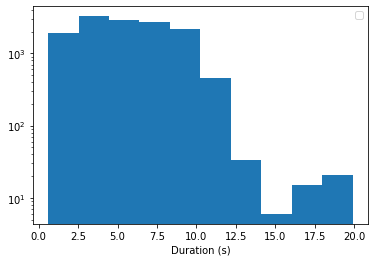

In [15]:
import matplotlib.pyplot as plt

plt.hist(df.loc[df.cuts.isin((0, "0"))].duration)
plt.xlabel("Duration (s)")
plt.legend()
plt.semilogy()
plt.savefig("images/success_after_repeated_splitting.png")
plt.show()

In [14]:
c1 = df.duration.between(15, 20)
c2 = df.cuts.isin([0, "0"])

df.loc[c1&c2, :].tail()

,path,sentence,duration,filesize,to_edit,cuts
19847,/home/peterr/macocu/task6_speech/data/00018027.flac.wav,zakona o komunalnom gospodarstvu za neizgrađeno građevinsko zemljište ima propisani koeficijent ...,19.8,633678,True,0
19855,/home/peterr/macocu/task6_speech/data/00000964.flac.wav,kolega pernar je u svojoj raspravi u više navrata a to je kasnije kolega bulj rekao na primjeru ...,19.8,633678,True,0
19856,/home/peterr/macocu/task6_speech/data/00022019.flac.wav,pravo na zaštitu osobnih podataka je jedno od temeljnih prava zaštite interesa svakog pojedinca ...,19.8,633678,True,0
19881,/home/peterr/macocu/task6_speech/data/00008862.flac.wav,mogućnost zaduživanja hbora na tržištu ograničene su rejtingom te hbor kod donošenja odluka o za...,19.9,636878,True,0
19886,/home/peterr/macocu/task6_speech/data/00008559.flac.wav,ali isto tako i hrvatska u svom izvoznom cilju može profitirati na način što su neka tržišta dos...,19.9,636878,True,0


In [13]:
file = "/home/peterr/macocu/task6_speech/data/00008559.flac.wav"

audio = AudioSegment.from_file(file)
silences = detect_silence(audio, min_silence_len=300, silence_thresh=-40)
silences

[[951, 1295],
 [1698, 2444],
 [2940, 3457],
 [4648, 5728],
 [5919, 6556],
 [6753, 7109],
 [7642, 8612],
 [10283, 10895],
 [11209, 11858],
 [13466, 13915],
 [14314, 14757],
 [14884, 15272],
 [16947, 17364],
 [19237, 19900]]